In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression 

In [126]:
df=pd.read_csv("Housing.csv")
df.head(6)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished


In [50]:
df.shape

(545, 13)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [52]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [53]:
df.duplicated().sum()

0

In [54]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [55]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [56]:
print(df.area.value_counts()) #usec to find unique value in column
print(df.bedrooms.value_counts())
print(df.bathrooms.value_counts())
print(df.parking.value_counts())

area
6000    24
3000    14
4500    13
4000    11
5500     9
        ..
6862     1
4815     1
9166     1
6321     1
3620     1
Name: count, Length: 284, dtype: int64
bedrooms
3    300
2    136
4     95
5     10
6      2
1      2
Name: count, dtype: int64
bathrooms
1    401
2    133
3     10
4      1
Name: count, dtype: int64
parking
0    299
1    126
2    108
3     12
Name: count, dtype: int64


In [131]:
# Step 2: Replace 'yes' with 1 and 'no' with 0 in the entire dataset
df.replace({'yes': 1, 'no': 0}, inplace=True)
df.replace({'furnished': 1, 'unfurnished': 0,'semi-furnished':2}, inplace=True)

# Step 3: Save the updated dataset to a new CSV file
df.to_csv("updated_dataset.csv", index=False)

In [132]:
df.head(4)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,2
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1


In [133]:
X=df.drop(columns=['stories','price','hotwaterheating','prefarea'],axis=1) #remove any column
Y=df['price']

In [134]:
print(X)

     area  bedrooms  bathrooms mainroad guestroom basement airconditioning  \
0    7420         4          2        1         0        0               1   
1    8960         4          4        1         0        0               1   
2    9960         3          2        1         0        1               0   
3    7500         4          2        1         0        1               1   
4    7420         4          1        1         1        1               1   
..    ...       ...        ...      ...       ...      ...             ...   
540  3000         2          1        1         0        1               0   
541  2400         3          1        0         0        0               0   
542  3620         2          1        1         0        0               0   
543  2910         3          1        0         0        0               0   
544  3850         3          1        1         0        0               0   

     parking furnishingstatus  
0          2                1  

In [135]:
print(Y)

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64


In [136]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state=2)

In [137]:
lin_regr_model=LinearRegression()


In [138]:
lin_regr_model.fit(X_train,Y_train) #used to do calculation

LinearRegression()

In [139]:
training_data_pred=lin_regr_model.predict(X_train)

In [140]:
print(lin_regr_model.predict(X_test))

[ 3464269.01010845  4168462.52099133  2339427.15563574  3572257.1091478
  5746332.18651295  4565699.93596102  4284053.65437718  3173604.67791838
  3805471.60133167  3588760.71011245  3665875.47535357  3559347.20693556
  4024640.07880006  4521188.41416884  5160237.72150836  6874195.09701591
  6379598.38177741  3802543.04743873  3325315.02373332  3939541.96510086
  6249974.8202502   4239245.89917317  5156776.71350717  6043387.12267106
  2066297.32184882  2572219.98522566  3044638.99066175  4040535.68744154
  5742631.76159654  3131494.80121847  5001125.73499318  3511942.39059153
  3432136.08848646  5409189.12853827  4092607.34357397  7564145.82407459
  3026328.78715092  5982731.40768127  5048127.76105954  2960026.54370883
  6230324.99173574  3454767.7421108   3279070.71001334  4513640.00035772
  2815134.11139681  3913802.3809688   3316376.93138201  3424551.03134112
  5194876.53127544  5169611.03734274 10390327.39990428  5780988.39779374
  2830279.54031829  3044638.99066175  4390285.041837

In [141]:
error_score=metrics.r2_score(Y_train,training_data_pred) #r2 score used to find the accuracy of the model 
print("R squared error : ",error_score)

R squared error :  0.6099353428867775


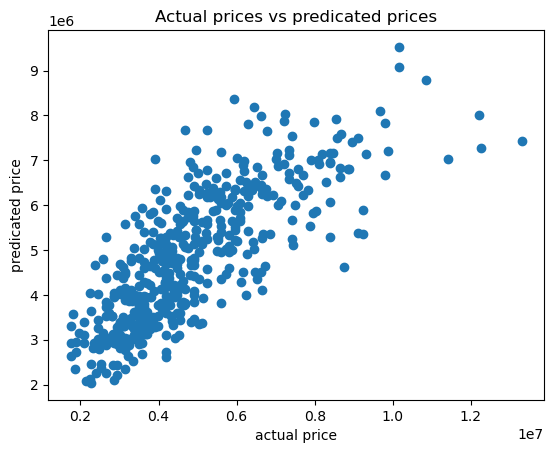

In [142]:
# visual price and predict
plt.scatter(Y_train,training_data_pred)
plt.xlabel("actual price")
plt.ylabel("predicated price")
plt.title("Actual prices vs predicated prices")
plt.show()

In [143]:
test_data_pred=lin_regr_model.predict(X_test)

In [144]:
error_score=metrics.r2_score(Y_test,test_data_pred)
print("R squared Error: ",error_score)

R squared Error:  0.6978239753126142


In [145]:

print("predicted selling price:", lin_regr_model.predict(X_test.iloc[2].to_frame().T))
print("actual selling price:", Y_test.iloc[2])

predicted selling price: [2339427.15563574]
actual selling price: 3255000


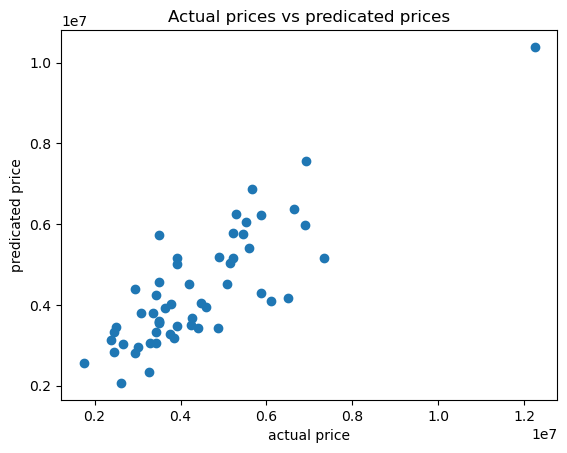

In [146]:
plt.scatter(Y_test,test_data_pred)
plt.xlabel("actual price")
plt.ylabel("predicated price")
plt.title("Actual prices vs predicated prices")
plt.show()

In [147]:
import gradio as gr
import pandas as pd
import joblib
joblib.dump(lin_regr_model, "house_model.pkl")

['house_model.pkl']

In [148]:
# Load trained model (run joblib.dump(lin_regr_model, 'lin_model.pkl') after training once)
model = joblib.load("house_model.pkl")

def predict_price(area,bedrooms,bathrooms,mainroad,guestroom,basement,airconditioning,parking,furnishingstatus	):
    try:
        input_df = pd.DataFrame([[area,bedrooms,bathrooms,mainroad,guestroom,basement,airconditioning,parking,furnishingstatus]],
                                columns=['area','bedrooms','bathrooms','mainroad','guestroom','basement','airconditioning','parking','furnishingstatus'])
        prediction = model.predict(input_df)
        return f"Predicted Price: ₹ {round(prediction[0], 2)} Lakhs"
    except Exception as e:
        return f"Error: {e}"

In [149]:
# Create Gradio Interface
iface = gr.Interface(
    fn=predict_price,
    inputs=[
        gr.Number(label="area (in sqft)"),
        gr.Number(label="bedrooms"),
        gr.Number(label="bathrooms"),
        gr.Radio([0, 1], label="mainroad(0=no, 1=yes)"),
        gr.Radio([0, 1], label="guestroom (0=no, 1=yes)"),
        gr.Radio([0, 1], label="basement (0=no, 1=yes)"),
         gr.Radio([0, 1], label="airconditioning (0=no, 1=yes)"),
         gr.Radio([0, 1], label="parking (0=no, 1=yes)"),
         gr.Radio([0, 1,2], label="furnishingstatus (0=unfurnished, 1=furnished, 2=semi-furnished)"),
    ],
    outputs=gr.Textbox(label="Predicted Selling Price"),
    title=" House Price Predictor",
    description="fill your house data and see there estimated price!"
)

iface.launch()

* Running on local URL:  http://127.0.0.1:7862
* To create a public link, set `share=True` in `launch()`.
